<a href="https://colab.research.google.com/github/vladikslava/dataset-lines/blob/main/%D0%B4%D0%B0%D1%82%D0%B0%D1%81%D0%B5%D1%82_%D0%BF%D0%BE%D0%BB%D0%BE%D1%81%D0%BA%D0%B8%D0%A7%D0%91.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pillow opencv-python numpy matplotlib



для генерации датасета

In [11]:
import os
from PIL import Image, ImageDraw
import numpy as np
import random

# Создаем папку для хранения изображений
if not os.path.exists('/content/dataset'):
    os.makedirs('/content/dataset')

def generate_rectangle(image_size=(128, 128)):
    img = Image.new("L", image_size, color=random.randint(0, 255))
    draw = ImageDraw.Draw(img)

    # Убедимся, что прямоугольник находится внутри границ изображения
    x1 = random.randint(0, image_size[0] - 50)
    y1 = random.randint(0, image_size[1] - 50)
    x2 = random.randint(x1 + 10, x1 + 50)
    y2 = random.randint(y1 + 10, y1 + 50)

    draw.rectangle([x1, y1, x2, y2], fill=random.randint(0, 255))
    return img

def generate_circle(image_size=(128, 128)):
    img = Image.new("L", image_size, color=random.randint(0, 255))
    draw = ImageDraw.Draw(img)
    radius = random.randint(10, 50)
    center_x, center_y = random.randint(radius, image_size[0]-radius), random.randint(radius, image_size[1]-radius)
    bbox = [(center_x-radius, center_y-radius), (center_x+radius, center_y+radius)]
    draw.ellipse(bbox, fill=random.randint(0, 255))
    return img

def generate_stripes(image_size=(128, 128), direction='horizontal', stripe_width=10):
    img = Image.new("L", image_size)
    draw = ImageDraw.Draw(img)

    for i in range(0, image_size[1], stripe_width*2):
        if direction == 'horizontal':
            start_row = i
            end_row = min(i + stripe_width, image_size[1])
            color = random.randint(0, 255)
            draw.rectangle([0, start_row, image_size[0], end_row], fill=color)
        else:
            start_col = i
            end_col = min(i + stripe_width, image_size[0])
            color = random.randint(0, 255)
            draw.rectangle([start_col, 0, end_col, image_size[1]], fill=color)

    return img

def generate_gradient(image_size=(128, 128), gradient_type='linear'):
    img = Image.new("L", image_size)
    draw = ImageDraw.Draw(img)

    if gradient_type == 'linear':
        for row in range(image_size[1]):
            value = int(row / float(image_size[1]) * 255)
            draw.line([(0, row), (image_size[0], row)], fill=value)
    elif gradient_type == 'radial':
        cx, cy = image_size[0] // 2, image_size[1] // 2
        max_dist = np.sqrt(cx**2 + cy**2)
        for x in range(image_size[0]):
            for y in range(image_size[1]):
                dist = np.sqrt((cx-x)**2 + (cy-y)**2)
                value = int(255 * (dist/max_dist))
                draw.point([x, y], fill=value)

    return img

# Параметры датасета
num_images_per_class = 1000
image_size = (128, 128)

for idx in range(num_images_per_class):
    # Генерируем прямоугольник
    rectangle_img = generate_rectangle()
    rectangle_img.save(f'/content/dataset/rectangle_{idx}.png')

    # Генерируем круг
    circle_img = generate_circle()
    circle_img.save(f'/content/dataset/circle_{idx}.png')

    # Генерируем горизонтальные полосы
    horizontal_stripe_img = generate_stripes(direction='horizontal')
    horizontal_stripe_img.save(f'/content/dataset/horizontal_stripe_{idx}.png')

    # Генерируем вертикальные полосы
    vertical_stripe_img = generate_stripes(direction='vertical')
    vertical_stripe_img.save(f'/content/dataset/vertical_stripe_{idx}.png')

    # Генерируем линейный градиент
    linear_gradient_img = generate_gradient(gradient_type='linear')
    linear_gradient_img.save(f'/content/dataset/linear_gradient_{idx}.png')

    # Генерируем радиальный градиент
    radial_gradient_img = generate_gradient(gradient_type='radial')
    radial_gradient_img.save(f'/content/dataset/radiant_gradient_{idx}.png')

print("Датасет успешно создан!")

Датасет успешно создан!


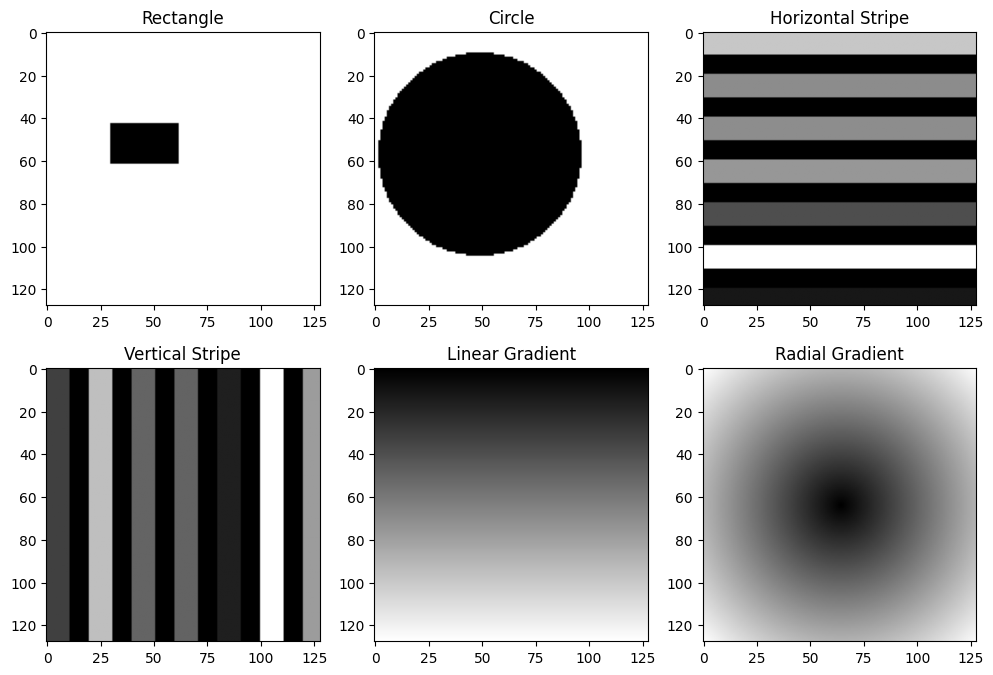

In [14]:
import matplotlib.pyplot as plt

# Отображение примера изображений
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

axs[0][0].imshow(Image.open('/content/dataset/rectangle_0.png'), cmap="gray")
axs[0][0].set_title('Rectangle')

axs[0][1].imshow(Image.open('/content/dataset/circle_0.png'), cmap="gray")
axs[0][1].set_title('Circle')

axs[0][2].imshow(Image.open('/content/dataset/horizontal_stripe_0.png'), cmap="gray")
axs[0][2].set_title('Horizontal Stripe')

axs[1][0].imshow(Image.open('/content/dataset/vertical_stripe_0.png'), cmap="gray")
axs[1][0].set_title('Vertical Stripe')

axs[1][1].imshow(Image.open('/content/dataset/linear_gradient_0.png'), cmap="gray")
axs[1][1].set_title('Linear Gradient')

axs[1][2].imshow(Image.open('/content/dataset/radiant_gradient_0.png'), cmap="gray")
axs[1][2].set_title('Radial Gradient')

plt.show()

In [16]:
!zip -r /content/dataset.zip /content/dataset
from google.colab import files
files.download('/content/dataset.zip')





Выходные данные были обрезаны до нескольких последних строк (5000).
updating: content/dataset/radiant_gradient_19.png (stored 0%)
updating: content/dataset/vertical_stripe_823.png (deflated 33%)
updating: content/dataset/horizontal_stripe_422.png (deflated 6%)
updating: content/dataset/radiant_gradient_628.png (stored 0%)
updating: content/dataset/circle_325.png (deflated 4%)
updating: content/dataset/linear_gradient_107.png (deflated 42%)
updating: content/dataset/rectangle_292.png (deflated 32%)
updating: content/dataset/circle_609.png (deflated 2%)
updating: content/dataset/circle_866.png (deflated 10%)
updating: content/dataset/horizontal_stripe_150.png (deflated 7%)
updating: content/dataset/radiant_gradient_122.png (stored 0%)
updating: content/dataset/rectangle_935.png (deflated 31%)
updating: content/dataset/radiant_gradient_408.png (stored 0%)
updating: content/dataset/vertical_stripe_109.png (deflated 33%)
updating: content/dataset/horizontal_stripe_579.png (deflated 6%)
upda

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>